<a href="https://colab.research.google.com/github/mckhannacademy/Stats-112-Final-Project/blob/main/Final_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Analysis (Before Machine Learning)

In [1]:
import pandas as pd
import plotly.express as px

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')
data_dir = "/content/gdrive/My Drive/csv_files/"

Mounted at /content/gdrive


In [3]:
df_joined=pd.read_csv(data_dir+"CombinedData.csv")

For the analysis, to try to reduce error (due to injuries, illness, etc.), I will be evaluating players based on "per 90 minutes" statistics (representing the impact they would have on one full match). While some variables are already converted to being available per 90 minutes (variables with the suffix ".1"), others will need to be converted first:

In [4]:
df_joined["PrgPper90"] = df_joined["PrgP"] / df_joined["90s"]
df_joined["PrgCper90"] = df_joined["PrgC"] / df_joined["90s"]
df_joined["Tklsper90"] = df_joined["Tkl"] / df_joined["90s"]
df_joined["Intsper90"] = df_joined["Int"] / df_joined["90s"]
df_joined["Chlgsper90"] = df_joined["Tkl.1"] / df_joined["90s"]
df_joined["Blocksper90"] = df_joined["Blocks"] / df_joined["90s"]
df_joined["T+Iper90"] = df_joined["Tkl+Int"] / df_joined["90s"]
df_joined["A3per90"] = df_joined["Att 3rd"] / df_joined["90s"]


There is still one issue, as seen in the table below:

In [5]:
df_joined[["G+A.1", "Player", "MP", "Pos", "Min"]].sort_values(by="G+A.1", ascending=False)

,G+A.1,Player,MP,Pos,Min
497,11.25,Neco Williams,1,DF,8
800,1.87,Connor Wickham,6,FW,96
911,1.45,Ben Gibson,1,DF,62
1092,1.34,Connor Wickham,6,FW,67
1015,1.31,Michael Obafemi,6,FW,137
...,...,...,...,...,...
300,0.00,Harvey Elliott,6,MF,346
138,0.00,Jakub Moder,12,DF,647
141,0.00,Marvelous Nakamba,13,MF,749
297,0.00,Paul Dummett,3,DF,198


As seen above, playes who played a very low amount of minutes can be very overweighted when using per-90 statistics. For example, the player with by far the most goals and assists per 90 minutes is Neco Williams, who played only 8 minutes that season, registering one assist. As such, per 90 statistics should only be used on players who have a certain amount of matches played.

To this effect, for the remainder of the analysis, I will focus on players who played in ten or more matches and have a base overall higher than 65. This should eliminate most outliers from this data

In [6]:
df_joined = df_joined[df_joined["Min"] > 500]
df_joined = df_joined[df_joined["MP"] > 9]

*For all of the analysis below, players will be split by position. This is the case because I both wanted to see relationships between overall and statistics more easily and because I wanted to emphasize the importance of position on overall*

First, I wanted to look at goals. In this case, a higher rate of goalscoring seemed to indicate a higher overall on average for forwards, some correlation for midfielders, and very little for defenders.

In [7]:
px.scatter(y=df_joined["overall"], x=df_joined["Gls.1"], facet_row=df_joined["Pos"], color = df_joined["Age"], trendline="lowess")

Even though I averaged stats earlier to be averaged per 90 minutes, I was still wondering whether playing more time got a higher rating. As seen in the plot below, there does seem to be some sort of slight trend

In [8]:
px.scatter(y=df_joined["overall"], x=df_joined["90s"], facet_row=df_joined["Pos"], color = df_joined["Age"], trendline="lowess")

Assists and Progressive Carries (dribbles that moved forwards) also seem to follow a similar trend as goals, although there seemed to be some greater correlation for defenders

In [9]:
px.scatter(y=df_joined["overall"], x=df_joined["Ast.1"], facet_row=df_joined["Pos"], color = df_joined["Age"], trendline = "lowess")

In [11]:
px.scatter(y=df_joined["overall"], x=df_joined["PrgCper90"], facet_row=df_joined["Pos"], color = df_joined["Age"], trendline = "lowess")

Conversely, Progressive Passes (forward passes) seem to be a better indicator for midfielders and deffenders, with both indicating a stronger positive correlation than forwards

In [10]:
px.scatter(y=df_joined["overall"], x=df_joined["PrgPper90"], 
           facet_row=df_joined["Pos"], color = df_joined["Age"],
           trendline = "lowess")

xG (Expected Goals, a metric of how many goals a player "should have" scored) is a little less convincing, as it seems like there is a pretty wide variance at each level.

In [15]:
px.scatter(y=df_joined["overall"], x=df_joined["xG.1"], 
           facet_row=df_joined["Pos"], color = df_joined["Age"])

Interestingly enough, defensive statistics seem to be less positively correlated, as seen in the remaining visuals

In [16]:
px.scatter(y=df_joined["overall"], x=df_joined["Tklsper90"], 
           facet_row=df_joined["Pos"], color = df_joined["Age"], 
           trendline="lowess")

In [17]:
px.scatter(y=df_joined["overall"], x=df_joined["Intsper90"],
           facet_row=df_joined["Pos"], color = df_joined["Age"], 
           trendline="lowess")

In [18]:
px.scatter(y=df_joined["overall"], x=df_joined["Chlgsper90"], facet_row=df_joined["Pos"], color = df_joined["Age"], trendline="lowess")

In [19]:
px.scatter(y=df_joined["overall"], x=df_joined["Tkl%"], 
           facet_row=df_joined["Pos"], color = df_joined["Age"], 
           trendline="lowess")

In [20]:
px.scatter(y=df_joined["overall"], x=df_joined["Blocks"], facet_row=df_joined["Pos"], color = df_joined["Age"], trendline="lowess")

At this point, I will download these files for the machine learning notebook

In [77]:
from google.colab import files

df_joined.to_csv('CombinedPremData.csv', encoding = 'utf-8-sig') 
files.download('CombinedPremData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Analysis (After Machine Learning)

This dataframe is being downloaded following the Machine Learning notebook

In [22]:
df_results = pd.read_csv(data_dir + "MLResults.csv")
df_results

,Unnamed: 0.1,Unnamed: 0,Unnamed: 0_x,Rk_x,Player,Nation,Pos,Squad,Age,Born_x,...,PrgPper90,PrgCper90,Tklsper90,Intsper90,Chlgsper90,Blocksper90,T+Iper90,A3per90,results,difference
0,0,0,2,3,Che Adams,SCO,FW,Southampton,24,1996,...,1.925676,1.081081,0.844595,0.135135,0.202703,0.675676,0.979730,0.202703,78.146193,-2.146193
1,1,1,3,4,Tosin Adarabioyo,ENG,DF,Fulham,22,1997,...,2.286585,0.152439,1.128049,1.280488,0.579268,0.792683,2.408537,0.030488,78.495954,-3.495954
2,2,3,7,8,Rayan Aït Nouri,FRA,DF,Wolves,19,2001,...,3.461538,3.012821,1.858974,0.961538,0.833333,0.897436,2.820513,0.064103,75.996565,0.003435
3,3,4,9,10,Nathan Aké,NED,DF,Manchester City,25,1995,...,5.842697,1.348315,1.123596,1.011236,0.337079,0.224719,2.134831,0.112360,79.417954,-1.417954
4,4,5,10,11,Marc Albrighton,ENG,DF,Leicester City,30,1989,...,4.329897,2.371134,1.701031,0.876289,0.824742,1.494845,2.577320,0.206186,77.074461,-2.074461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,438,564,540,541,Wilfried Zaha,CIV,FW,Crystal Palace,28,1992,...,3.941368,3.680782,1.302932,0.162866,0.325733,0.912052,1.465798,0.358306,82.515325,-0.515325
439,439,565,542,543,Oleksandr Zinchenko,UKR,DF,Manchester City,24,1996,...,9.741379,2.758621,1.724138,1.206897,0.948276,0.948276,2.931034,0.258621,83.358688,-4.358688
440,440,566,543,544,Hakim Ziyech,MAR,MF,Chelsea,28,1993,...,5.986395,3.401361,1.292517,0.680272,0.680272,0.748299,1.972789,0.136054,80.235054,2.764946
441,441,567,544,545,Kurt Zouma,FRA,DF,West Ham,26,1994,...,1.428571,0.476190,0.476190,1.471861,0.173160,1.341991,1.948052,0.000000,75.923761,4.076239


First of all, I would like to see whether there is any correlation between the difference of ratings and player's age. Ultimately, there does not seem to be an overarching trend, as variance exists amongst both younger and older players

In [20]:
px.scatter(df_results, x="age", y="difference")

To see which types of players had the largest discrepancy, I'm creating a second dataframe to represent all players who had a difference of over 4 overalls

In [84]:
df_high_error = df_results.copy()
df_high_error = df_high_error[(df_high_error["difference"] > 4) | 
                              (df_high_error["difference"] < -4)]
df_high_error["overall"] = df_high_error["overall"].astype(int)
df_high_error = df_high_error[df_high_error["overall"] < 88]
df_high_error.sort_values(by="difference", ascending=False)

,Unnamed: 0.1,Unnamed: 0,Unnamed: 0_x,Rk_x,Player,Nation,Pos,Squad,Age,Born_x,...,PrgPper90,PrgCper90,Tklsper90,Intsper90,Chlgsper90,Blocksper90,T+Iper90,A3per90,results,difference
215,215,270,24,25,Pierre-Emerick Aubameyang,GAB,FW,Arsenal,32,1989,...,2.260870,1.826087,0.956522,0.000000,0.260870,1.043478,0.956522,0.086957,74.584817,10.415183
56,56,69,148,149,Fabinho,BRA,DF,Liverpool,26,1993,...,4.350877,0.947368,2.035088,1.543860,0.947368,0.982456,3.578947,0.280702,77.963436,9.036564
270,270,348,150,151,Fabinho,BRA,MF,Liverpool,27,1993,...,5.214008,0.700389,1.789883,1.517510,0.933852,1.284047,3.307393,0.233463,79.069298,7.930702
116,116,143,303,304,Joël Matip,CMR,DF,Liverpool,28,1991,...,3.636364,0.779221,1.818182,0.909091,0.909091,0.779221,2.727273,0.000000,76.132192,7.867808
359,359,461,353,354,Wilfred Ndidi,NGA,MF,Leicester City,24,1996,...,3.166667,0.777778,3.333333,2.333333,1.222222,2.000000,5.666667,0.055556,76.275843,7.724157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,379,493,414,415,Mads Roerslev,DEN,DF,Brentford,22,1999,...,1.594203,1.014493,1.666667,1.159420,1.014493,1.014493,2.826087,0.144928,74.643920,-5.643920
38,38,46,111,112,Stuart Dallas,NIR,MF,Leeds United,29,1991,...,6.147757,2.506596,1.952507,1.160950,0.791557,1.081794,3.113456,0.158311,80.915563,-5.915563
26,26,32,80,81,Tom Cairney,SCO,MF,Fulham,29,1991,...,8.571429,2.619048,1.071429,0.000000,0.119048,0.714286,1.071429,0.476190,81.482505,-6.482505
277,277,360,181,182,Saman Ghoddos,IRN,MF,Brentford,27,1993,...,4.166667,1.166667,2.833333,0.500000,1.500000,0.333333,3.333333,0.500000,75.016606,-7.016606


This following graph plots the original overall against the predicted overall, with the color gradient representing the difference between the two. 

In this plot, it seems like there may be a larger quantity of players who were given a higher rating by the model, however, the largest gaps were mostly players who were rated lower by the model

In [94]:
px.scatter(df_results, x="overall", y="results", color="difference")

In [24]:
print(df_results["overall"].mean())
print(df_results["overall"].std())

78.32054176072235
3.976310811497535


In [25]:
print(df_results["results"].mean())
print(df_results["results"].std())

78.02882097865857
2.6756304809213263


The model seemed to have evaluated midfielders the worst, with that being the position with the most different errors. Notably, midfielders consisted of a fairly large percentage of "underrated" (rated lower by my model) players, whereas "overrated" players seemed pretty consitent across position

<Axes: title={'center': 'Amount of Players With Error > 4 (underrated)'}>

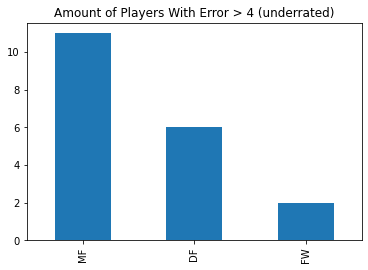

In [48]:
df_high_error[df_high_error["difference"]<0]["Pos"].value_counts().plot.bar(
    title="Amount of Players With Error > 4 (underrated)")

<Axes: title={'center': 'Amount of Players With Error > 4 (overrated)'}>

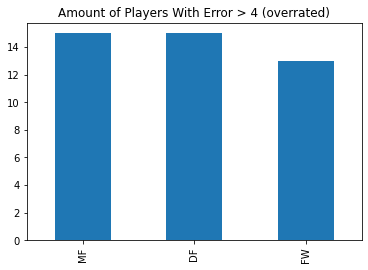

In [49]:
df_high_error[df_high_error["difference"]>0]["Pos"].value_counts().plot.bar(
    title="Amount of Players With Error > 4 (overrated)")

However, this count does not consider the proportion of each position originally. If you take these high error players as a proportion of the original players from each position, it seems as if defenders have by far the lowest percentage.

<Axes: >

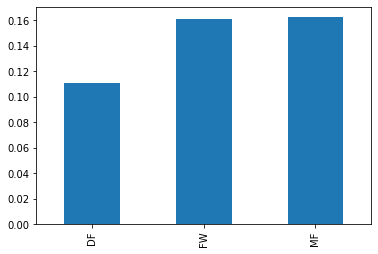

In [85]:
df_high_error["Pos"].value_counts().divide(
    df_results["Pos"].value_counts()).plot.bar()

Similarly, if you look at the amount of players who were within one overall, defenders have the highest proportion

<Axes: >

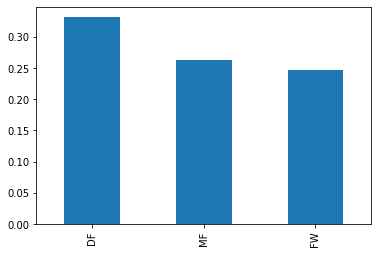

In [82]:
df_low_error = df_results.copy()
df_low_error = df_high_error[(df_high_error["difference"] > -1) & 
                              (df_high_error["difference"] < 1)]
df_low_error["Pos"].value_counts().divide(
    df_results["Pos"].value_counts()).plot.bar()

From this trend, we can also see which squads were rated the most differently. My model generally rated "Top 6" players worse, which makes sense given a trend that will be seen later. One interesting fact was that players from Burnley were rated almost perfectly for this season. Additionally, out of the "Top 6" (the generally best performing Premier League clubs), Arsenal seemed to be the most accurately rated.

<Axes: xlabel='Squad'>

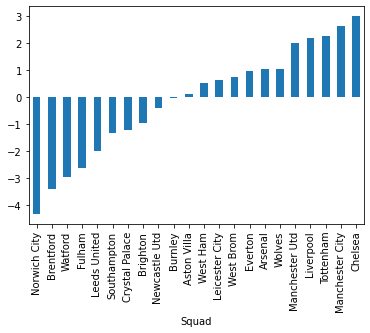

In [52]:
df_results.groupby("Squad")["difference"].mean().sort_values().plot.bar()

Finally, to better understand how the model rated players versus the real ratings, I made a histogram that shows the distribution of ratings for both. As you can see, the two follow a somewhat similar trend, although the model projections seem to be condensed when compared to the actual ratings. If I had to guess why, at least one explanation would be data availability, as the quantity of high rated players is likely not enough for the model to make high overall predictions.

<Axes: ylabel='Frequency'>

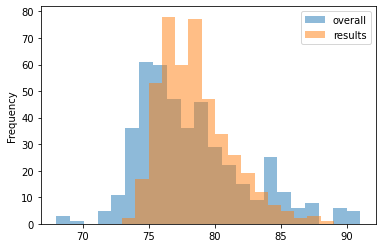

In [111]:
df_results["overall"].plot.hist(alpha=0.5, legend=True, bins=22)
df_results["results"].round().plot.hist(alpha=0.5, legend=True, bins=16)